# Q2:

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## part one:

### **95% Confidence Interval for \( p \)**

The sample proportion $( \hat{p} )$ is approximately normally distributed for large $( N )$, according to the **Central Limit Theorem (CLT)**:

$$
\hat{p} \sim N\left(p, \frac{p(1-p)}{N}\right)
$$

This formula comes from the CLT, which states that:

$$
\hat{p} \sim N\left(p, \frac{p(1-p)}{N}\right)
$$

Since $( p )$ is unknown, we use the **sample proportion** $( \hat{p} )$ and the **standard error of the sample**:

$$
SE_{\hat{p}} = \sqrt{\frac{\hat{p}(1-\hat{p})}{N}}
$$

The **95% Confidence Interval (CI)** for \( p \) is given by:

$$
\text{CI} = \hat{p} \pm z \times \ SE
$$

which for 95% CI equals to 1.96

This interval provides a range of values within which the true proportion $( p )$ is likely to lie, with 95% confidence.

In [114]:
import scipy.stats as stats

def confidence_interval(p_hat, N, confidence = 0.95):
    z_score = stats.norm.ppf(1 - (1 - confidence) / 2)
    SE_p = np.sqrt(p_hat * (1 - p_hat) / N)
    CI_lower = p_hat - z_score * SE_p
    CI_upper = p_hat + z_score * SE_p
    return CI_lower, CI_upper


## part two:

In [115]:
def monte_carlo_simulation(p_true, N, num_simulations, confidence =0.95):
    count = 0
    for i in range(num_simulations):
        sample = np.random.binomial(1,p_true, N)
        p_hat = np.mean(sample)
        CI_lower,CI_upper = confidence_interval(p_hat, N, confidence)

        if CI_lower <= p_true <= CI_upper:
            count += 1
        
    capture_percentage = count / num_simulations
    return capture_percentage

p = 0.47
num_simulations = 100000
N = 30
confidence = 0.95
capture_percentage = monte_carlo_simulation(p, N, num_simulations,confidence)
print(capture_percentage)

0.93103


### part three:

In [116]:
file_path = "2016-general-election-trump-vs-clinton.csv"
election_df = pd.read_csv(file_path)
election_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,NaN,NaN,1


In [117]:

wanted_columns = ['Trump', 'Clinton', 'Pollster', 'Start Date', 'Number of Observations', 'Mode']
new_election_df = election_df[wanted_columns]
new_election_df.head()

,Trump,Clinton,Pollster,Start Date,Number of Observations,Mode
0,41.0,45.0,Insights West,2016-11-04,940.0,Internet
1,6.0,89.0,Insights West,2016-11-04,NaN,Internet
2,82.0,7.0,Insights West,2016-11-04,NaN,Internet
3,38.0,43.0,Insights West,2016-11-04,NaN,Internet
4,43.0,41.0,IBD/TIPP,2016-11-04,1107.0,Live Phone


In [118]:
new_election_df.isna().sum()

Trump                       0
Clinton                     0
Pollster                    0
Start Date                  0
Number of Observations    509
Mode                        0
dtype: int64

In [119]:
new_election_df = new_election_df.dropna()
new_election_df.isna().sum()

Trump                     0
Clinton                   0
Pollster                  0
Start Date                0
Number of Observations    0
Mode                      0
dtype: int64

## part four:

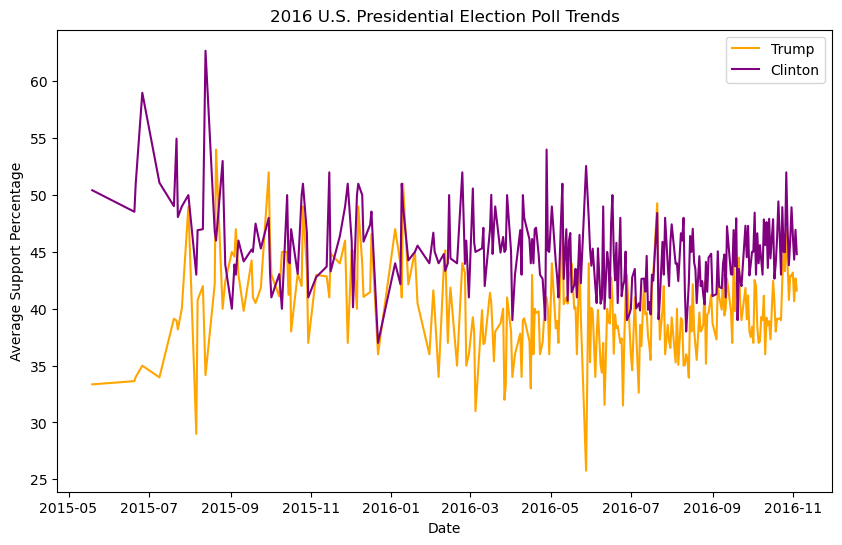

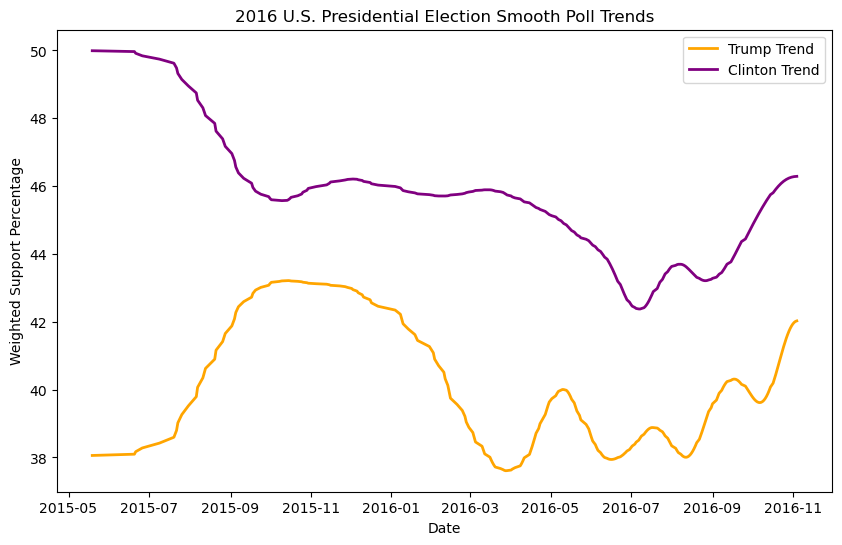

In [120]:
import seaborn as sns
from scipy.ndimage import gaussian_filter1d

def plot_time_series(election_df):
    new_election_df = election_df.copy()
    new_election_df = new_election_df.copy()
    new_election_df['Start Date'] = pd.to_datetime(new_election_df['Start Date'])
    new_election_df['Trump voters'] = new_election_df['Trump'] * new_election_df['Number of Observations'] /100
    new_election_df['Clinton voters'] = new_election_df['Clinton'] * new_election_df['Number of Observations'] /100


    poll_aggregated_df = new_election_df.groupby('Start Date').agg(
        {'Trump voters': 'sum',
         'Clinton voters': 'sum',
         'Number of Observations': 'sum'}
         )
    
    poll_aggregated_df = poll_aggregated_df.sort_values("Start Date")
    poll_aggregated_df = poll_aggregated_df.reset_index()

    poll_aggregated_df['Average Trump voters'] = poll_aggregated_df['Trump voters'] / poll_aggregated_df['Number of Observations'] *100
    poll_aggregated_df['Average Clinton voters'] = poll_aggregated_df['Clinton voters'] / poll_aggregated_df['Number of Observations'] *100

    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Start Date', y='Average Trump voters', data=poll_aggregated_df, color='orange', label='Trump')
    sns.lineplot(x='Start Date', y='Average Clinton voters', data=poll_aggregated_df, color='purple', label='Clinton')
    plt.xlabel('Date')
    plt.ylabel('Average Support Percentage')
    plt.title('2016 U.S. Presidential Election Poll Trends')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    poll_aggregated_df['Trump Avg Smoothed'] = gaussian_filter1d(poll_aggregated_df['Average Trump voters'], sigma=10)
    poll_aggregated_df['Clinton Avg Smoothed'] = gaussian_filter1d(poll_aggregated_df['Average Clinton voters'], sigma=10)
    plt.plot(poll_aggregated_df['Start Date'], poll_aggregated_df['Trump Avg Smoothed'], color='orange', linewidth=2, label='Trump Trend')
    plt.plot(poll_aggregated_df['Start Date'], poll_aggregated_df['Clinton Avg Smoothed'], color='purple', linewidth=2, label='Clinton Trend')
    
    plt.xlabel('Date')
    plt.ylabel('Weighted Support Percentage')
    plt.title('2016 U.S. Presidential Election Smooth Poll Trends')
    plt.legend()
    plt.show()

plot_time_series(new_election_df)
    


## part five:

In [121]:
total_number_voters = new_election_df['Number of Observations'].sum()
print(f"total number of voters {total_number_voters: .0f}")

total number of voters  1940931


## part six:

In [122]:
def display_voter_proportions(election_df, total_voters):
    trump_support = (election_df['Trump'] * election_df['Number of Observations'] /100).sum() / total_voters
    clinton_support = (election_df['Clinton'] * election_df['Number of Observations'] /100).sum() / total_voters
    
    proportions_df = pd.DataFrame({
        'Candidate': ['Trump', 'Clinton'],
        'Estimated Proportion': [trump_support, clinton_support]
    })
    
    return proportions_df

p_hat_df = display_voter_proportions(new_election_df, total_number_voters)
p_hat_df

,Candidate,Estimated Proportion
0,Trump,0.405834
1,Clinton,0.456121


## part seven:

In [123]:
trump_p_hat = p_hat_df[p_hat_df['Candidate'] == 'Trump']['Estimated Proportion'].values[0]
clinton_p_hat = p_hat_df[p_hat_df['Candidate'] == 'Clinton']['Estimated Proportion'].values[0]
trump_ci_lower, trump_ci_upper = confidence_interval(trump_p_hat, total_number_voters)
trump_ci = (trump_ci_lower, trump_ci_upper)
clinton_ci_lower, clinton_ci_upper = confidence_interval(clinton_p_hat, total_number_voters)
clinton_ci = (clinton_ci_lower, clinton_ci_upper)

print(f"Confidence interval for Trump: {trump_ci}")
print(f"Confidence interval for Clinton: {clinton_ci}")


Confidence interval for Trump: (0.4051427160362902, 0.4065243756841263)
Confidence interval for Clinton: (0.45542010669318844, 0.4568215134365329)


## part eight:

### a)

In [124]:
p_hat = clinton_p_hat
d=2*p_hat-1
clinton_se = np.sqrt(p_hat * (1 - p_hat) / total_number_voters)
d_se = 2*clinton_se
spread_ci= (d-1.96*d_se , d+1.96*2*d_se)
print(f"Estimated spread is: {d}")
print(f"Confidence interval for spread is: {spread_ci}")

Estimated spread is: -0.08775837987027868
Confidence interval for spread is: (-0.08915981236527412, -0.08495551488028778)


### b)

- $H_0$ : d=0
- $H_A$ : $d \neq 0$ 
so we have a two-sided hypothesis test wwe calculate the $z$ like before
$$
    z = \frac{d-0}{SE_d}
$$ 

In [125]:
from scipy.stats import norm
def hypothesis_test_spread(d, d_se):
    alpha = 0.05
    z_score = d / d_se
    p_value = 2 * (1 - norm.cdf(abs(z_score)))
    print("z-score: ", z_score)
    print("p-value: ", p_value)
    if p_value < alpha:
        print("Reject null hypothesis: so there is a significant difference between the two candidates")
    else:
        print("Fail to reject null hypothesis: So there is no significant difference between the two candidates")

hypothesis_test_spread(d, d_se)


z-score:  -122.73614687827322
p-value:  0.0
Reject null hypothesis: so there is a significant difference between the two candidates
